In [2]:
from os.path import join, expanduser, basename
from glob import glob
import numpy as np
import xarray as xa
import rioxarray as rxa
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
from scipy.optimize import curve_fit

In [3]:
def temp_model(T, tau):
    return np.exp(-T/tau)

def tau(cors, days):
    if np.sum(np.isnan(cors)) == 0:
        s = curve_fit(temp_model, days, cors, 5)[0][0]
        return s
    else:
        return np.nan

In [4]:
s1ds = glob(join(expanduser('~/scratch/data/uavsar/sentinel/'), 'S1*VV*'))

In [5]:
c1 = rxa.open_rasterio(glob(join(s1ds[0], '*corr.tif'))[0]).rio.reproject('EPSG:4326').rio.clip_box(-115.3, 44.2, -115.05, 44.4)
cor_vv_arr = np.zeros((len(s1ds), *c1.values[0].shape))

In [6]:
for i, fps in tqdm(enumerate(s1ds), total = len(s1ds)):
    c2 = rxa.open_rasterio(glob(join(fps, '*corr.tif'))[0]).rio.reproject_match(c1)
    cor_vv_arr[i] = c2.values[0]

 75%|███████▍  | 123/165 [01:08<00:23,  1.80it/s]ERROR 1: TIFFFillStrip:Read error at scanline 1016; got 7842 bytes, expected 27666
ERROR 1: TIFFReadEncodedStrip() failed.
ERROR 1: /bsuhome/zacharykeskinen/scratch/data/uavsar/sentinel/S1AB_20210223T134938_20210325T134856_VVP030_INT40_G_ueF_A344/S1AB_20210223T134938_20210325T134856_VVP030_INT40_G_ueF_A344_corr.tif, band 1: IReadBlock failed at X offset 0, Y offset 1017: TIFFReadEncodedStrip() failed.



RasterioIOError: Read or write failed. /bsuhome/zacharykeskinen/scratch/data/uavsar/sentinel/S1AB_20210223T134938_20210325T134856_VVP030_INT40_G_ueF_A344/S1AB_20210223T134938_20210325T134856_VVP030_INT40_G_ueF_A344_corr.tif, band 1: IReadBlock failed at X offset 0, Y offset 1017: TIFFReadEncodedStrip() failed.

In [8]:
days = [int(d.split('_')[-5].replace('VVP','')) for d in s1ds]

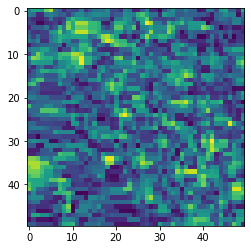

In [10]:
plt.imshow(cor_vv_arr[:50,:50,:50][0])

In [19]:
taus = np.apply_along_axis(arr = cor_vv_arr[:3], func1d = tau, axis = 0, days = days[:3])

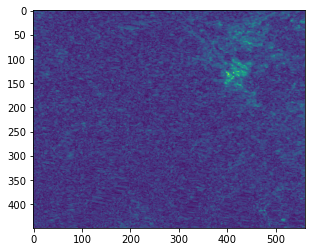

In [20]:
plt.imshow(taus)

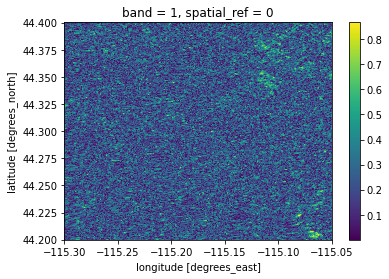

In [21]:
c1.plot()

In [22]:
c1.values[0] = taus

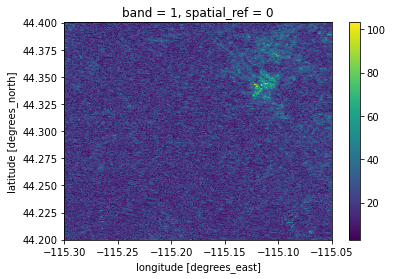

In [23]:
c1.plot()

In [25]:
c1.rio.to_raster(join('/bsuhome/zacharykeskinen/uavsar/results/taus','s1_lowman.tif'))